**Librerias**

In [87]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings; warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, average_precision_score, f1_score)
RANDOM_SEED = 42

from xgboost import XGBClassifier

from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_curve, auc
)

from sklearn.metrics import (
    precision_recall_curve, roc_curve, confusion_matrix,
    precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **1. CARGA Y EXPLORACIÓN INICIAL DEL DATASET**

**Cargar archivo desde Google Drive**

In [61]:
import warnings
warnings.filterwarnings("ignore")

In [62]:
drive.mount('/content/drive') # Montar Google Drive
file_path = "/content/drive/MyDrive/WILLY/creditcard.csv" # Ruta del archivo
df = pd.read_csv(file_path) # Cargar dataset en un dataframe

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Exploración Inicial**

In [63]:
print("Dimensiones del dataset:", df.shape)
print("\n Primeras filas del dataset:")
display(df.head())

print("\n Información general del dataset:")
print(df.info())

print("\n Resumen estadístico de las variables numéricas:")
display(df.describe())

Dimensiones del dataset: (284807, 31)

 Primeras filas del dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     28480

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Verificación de valores nulos**

In [64]:
print("\n Valores nulos por columna:")
print(df.isnull().sum())


 Valores nulos por columna:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


**Distribución de la variable objetivo (Clase)**

In [65]:
if "Class" in df.columns:   # La columna "Class" indica fraude (1), no fraude (0)
    print("\n Distribución de la variable objetivo (Clase):")
    print(df["Class"].value_counts(normalize=True).map("{:.2%}".format))


 Distribución de la variable objetivo (Clase):
Class
0    99.83%
1     0.17%
Name: proportion, dtype: object


**ANÁLISIS EXPLORATORIO GRÁFICO**

In [66]:
# Ajustes generales de estilo
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(12,6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

# **2. Análisis de datos**

**ANÁLISIS EXPLORATORIO PROFUNDO (EDA)**

In [67]:
# Ajustes globales de estilo
sns.set(style="whitegrid", palette="pastel")

***1. Balance de Clases***

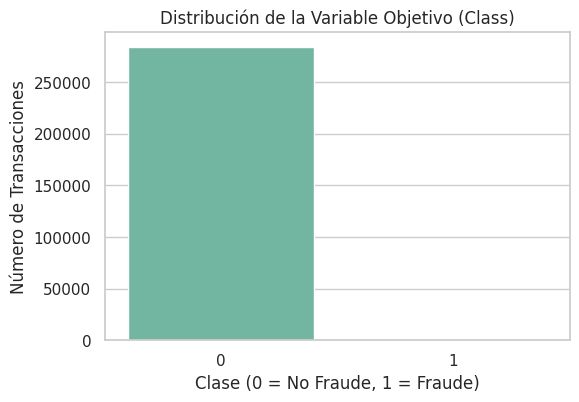

Proporción de clases (0=No Fraude, 1=Fraude):
Class
0    99.8273%
1     0.1727%
Name: proportion, dtype: object


In [68]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Class", hue="Class", palette="Set2", legend=False)
plt.title("Distribución de la Variable Objetivo (Class)")
plt.xlabel("Clase (0 = No Fraude, 1 = Fraude)")
plt.ylabel("Número de Transacciones")
plt.show()

fraude_pct = df["Class"].value_counts(normalize=True).map("{:.4%}".format)
print("Proporción de clases (0=No Fraude, 1=Fraude):")
print(fraude_pct)

***2. Distribución de Monto por Clase***

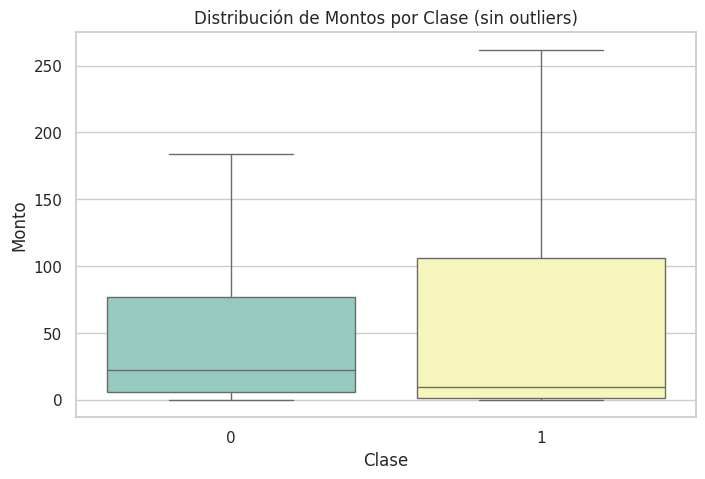

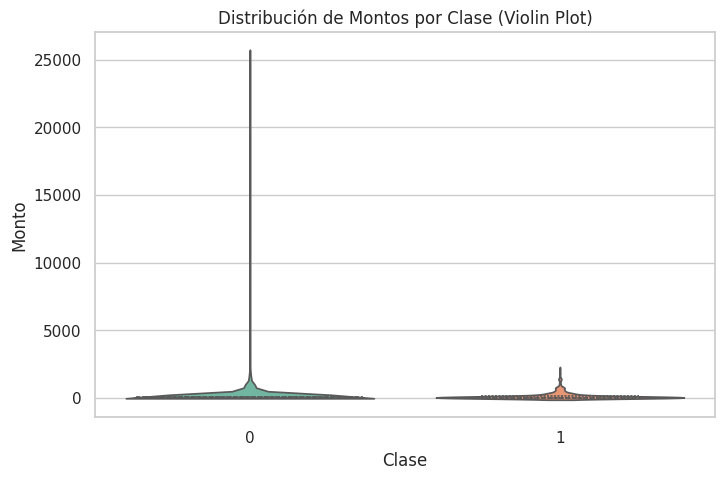

In [69]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Class", y="Amount", palette="Set3", showfliers=False)
plt.title("Distribución de Montos por Clase (sin outliers)")
plt.xlabel("Clase")
plt.ylabel("Monto")
plt.show()

plt.figure(figsize=(8,5))
sns.violinplot(data=df, x="Class", y="Amount", palette="Set2", inner="quartile")
plt.title("Distribución de Montos por Clase (Violin Plot)")
plt.xlabel("Clase")
plt.ylabel("Monto")
plt.show()

***3. Distribución Temporal por Clase***

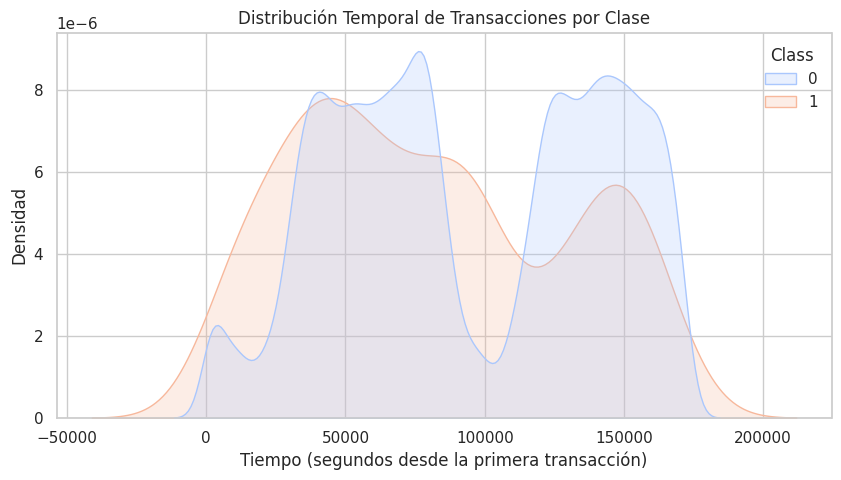

In [70]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x="Time", hue="Class", fill=True, common_norm=False, palette="coolwarm")
plt.title("Distribución Temporal de Transacciones por Clase")
plt.xlabel("Tiempo (segundos desde la primera transacción)")
plt.ylabel("Densidad")
plt.show()

***4. Correlación con la Variable Objetivo***

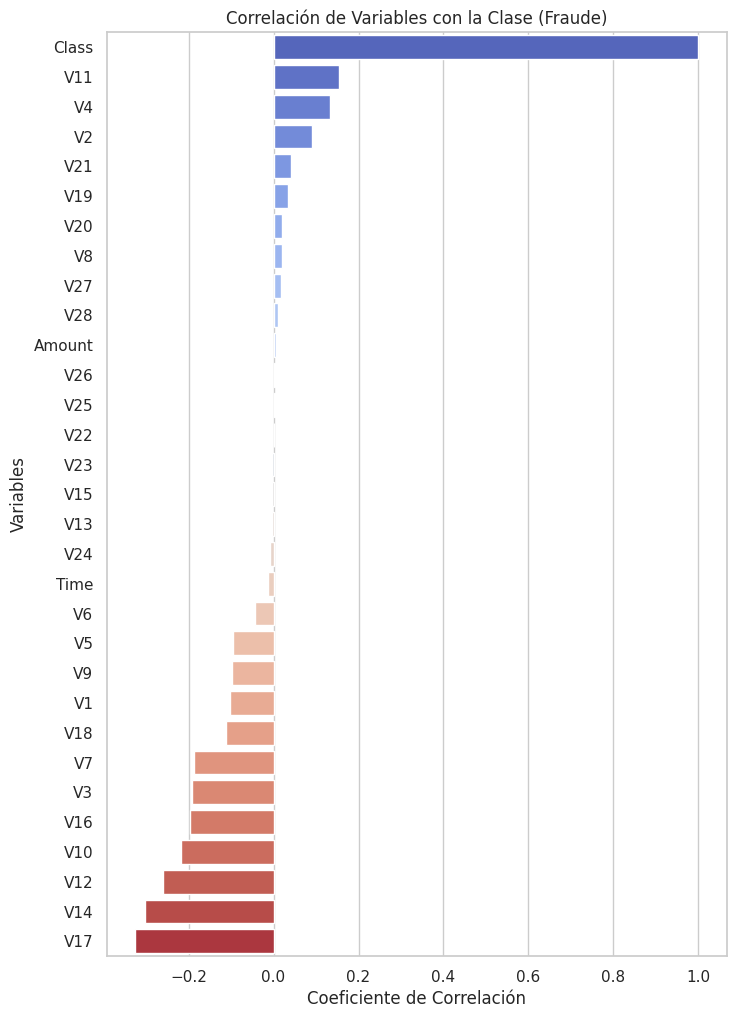

In [71]:
corr_matrix = df.corr()
corr_target = corr_matrix["Class"].sort_values(ascending=False)

plt.figure(figsize=(8,12))
sns.barplot(x=corr_target.values, y=corr_target.index, palette="coolwarm")
plt.title("Correlación de Variables con la Clase (Fraude)")
plt.xlabel("Coeficiente de Correlación")
plt.ylabel("Variables")
plt.show()

***5. Outliers en Monto***

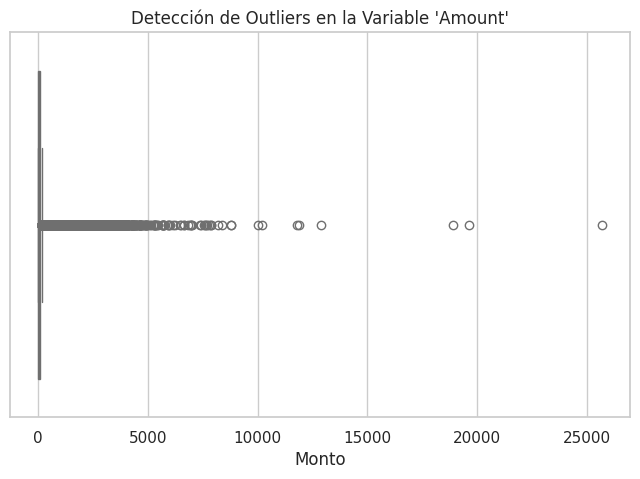

In [72]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Amount"], color="skyblue")
plt.title("Detección de Outliers en la Variable 'Amount'")
plt.xlabel("Monto")
plt.show()

# **3. Preparación para el desbalance**

**1. División en train/test (estratificada) y selección columnas**

In [73]:
X = df.drop(columns=["Class"])
y = df["Class"].astype(int)

# Estratificar es CLAVE en datasets desbalanceados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=RANDOM_SEED, stratify=y
)

**2. Preprocesamiento: escalado robusto SOLO para 'Amount' y 'Time' (**por outliers y asimetría; el resto ya viene estandarizado por PCA**)**

In [74]:
cols_to_scale = [c for c in ["Amount", "Time"] if c in X.columns]
preprocess = ColumnTransformer(
    transformers=[("robust", RobustScaler(), cols_to_scale)],
    remainder="passthrough"
)
# Ajustar en train y transformar
X_train_prep = preprocess.fit_transform(X_train)
X_test_prep  = preprocess.transform(X_test)

**3. Manejo del desbalance: SMOTE (+) + UNDER (-)**

Estrategia híbrida:
- SMOTE (sampling_strategy=0.10): amplía la minoritaria hasta ~10% de la mayoritaria
-> Genera ejemplos sintéticos "realistas" sin sobreajustar por duplicación.
- RandomUnderSampler (sampling_strategy=1.0): reduce la mayoritaria para quedar 1:1
-> Controla tamaño de datos y acelera entrenamiento manteniendo informatividad.

In [75]:
resampler = ImbPipeline(steps=[
    ("smote", SMOTE(sampling_strategy=0.10, k_neighbors=5, random_state=RANDOM_SEED)),
    ("under", RandomUnderSampler(sampling_strategy=1.0, random_state=RANDOM_SEED))
])

X_train_bal, y_train_bal = resampler.fit_resample(X_train_prep, y_train)

# ---- Mostrar distribución antes vs. después (conteo y %)
def dist(y_series):
    vc = y_series.value_counts().sort_index()
    pct = (vc / vc.sum() * 100).round(3)
    return pd.DataFrame({"conteo": vc, "porcentaje": pct.map(lambda x: f"{x}%")})

print("Distribución original en TRAIN:")
display(dist(y_train))

print("Distribución tras SMOTE + UnderSampler (TRAIN):")
display(dist(y_train_bal))

Distribución original en TRAIN:


,conteo,porcentaje
Class,,
0,227451,99.827%
1,394,0.173%


Distribución tras SMOTE + UnderSampler (TRAIN):


,conteo,porcentaje
Class,,
0,22745,50.0%
1,22745,50.0%


# **4. Construcción y entrenamiento del modelo de Clasificación**

 **1. REGRESIÓN (Ridge)**

In [76]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_bal, y_train_bal)

# Scores continuos (pueden ser <0 o >1; umbral a 0.5)
ridge_scores = ridge.predict(X_test_prep)
ridge_pred   = (ridge_scores >= 0.5).astype(int)

print("\n=== REGRESIÓN (Ridge) ===")
print("ROC-AUC:", round(roc_auc_score(y_test, ridge_scores), 4))
print("PR-AUC :", round(average_precision_score(y_test, ridge_scores), 4))
print(classification_report(y_test, ridge_pred, digits=4))
print("Matriz de confusión (Ridge):\n", confusion_matrix(y_test, ridge_pred))


=== REGRESIÓN (Ridge) ===
ROC-AUC: 0.955
PR-AUC : 0.2955
              precision    recall  f1-score   support

           0     0.9998    0.9871    0.9934     56864
           1     0.1040    0.8673    0.1858        98

    accuracy                         0.9869     56962
   macro avg     0.5519    0.9272    0.5896     56962
weighted avg     0.9982    0.9869    0.9920     56962

Matriz de confusión (Ridge):
 [[56132   732]
 [   13    85]]


**2. CLASIFICACIÓN (Logistic Regression)**

In [77]:
logit = LogisticRegression(max_iter=1000, solver="lbfgs")
logit.fit(X_train_bal, y_train_bal)

logit_proba = logit.predict_proba(X_test_prep)[:, 1]
logit_pred  = (logit_proba >= 0.5).astype(int)

print("\n=== CLASIFICACIÓN (Logistic Regression) ===")
print("ROC-AUC:", round(roc_auc_score(y_test, logit_proba), 4))
print("PR-AUC :", round(average_precision_score(y_test, logit_proba), 4))
print(classification_report(y_test, logit_pred, digits=4))
print("Matriz de confusión (Logistic):\n", confusion_matrix(y_test, logit_pred))


=== CLASIFICACIÓN (Logistic Regression) ===
ROC-AUC: 0.9713
PR-AUC : 0.7297
              precision    recall  f1-score   support

           0     0.9999    0.9734    0.9864     56864
           1     0.0561    0.9184    0.1058        98

    accuracy                         0.9733     56962
   macro avg     0.5280    0.9459    0.5461     56962
weighted avg     0.9982    0.9733    0.9849     56962

Matriz de confusión (Logistic):
 [[55350  1514]
 [    8    90]]


In [78]:
thresholds = np.linspace(0.05, 0.95, 19)
best = []
for t in thresholds:
    pred = (logit_proba >= t).astype(int)
    f1 = f1_score(y_test, pred)
    rec = (confusion_matrix(y_test, pred)[1,1] /
           (confusion_matrix(y_test, pred)[1].sum()))
    best.append((t, f1, rec))
pd.DataFrame(best, columns=["threshold","F1","Recall"]).sort_values("Recall", ascending=False).head()

,threshold,F1,Recall
0,0.05,0.010944,0.948980
1,0.10,0.017267,0.948980
2,0.15,0.024348,0.928571
3,0.20,0.032829,0.918367
4,0.25,0.042959,0.918367


**COMPROBACIÓN CON UN MODELO NO LINEAL (*RandomForest y XGBoost*) Y UNA CURVA Precision-Recall para elegir el umbral operativo**

**1. Random Forest**

In [79]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight="balanced",  # Ajusta pesos internamente
    random_state=RANDOM_SEED,
    n_jobs=-1
)
rf.fit(X_train_bal, y_train_bal)

rf_proba = rf.predict_proba(X_test_prep)[:, 1]
rf_pred  = (rf_proba >= 0.5).astype(int)

print("\n=== RANDOM FOREST ===")
print("ROC-AUC:", round(roc_auc_score(y_test, rf_proba), 4))
print("PR-AUC :", round(average_precision_score(y_test, rf_proba), 4))
print(classification_report(y_test, rf_pred, digits=4))
print("Matriz de confusión:\n", confusion_matrix(y_test, rf_pred))


=== RANDOM FOREST ===
ROC-AUC: 0.9776
PR-AUC : 0.801
              precision    recall  f1-score   support

           0     0.9998    0.9988    0.9993     56864
           1     0.5649    0.8878    0.6905        98

    accuracy                         0.9986     56962
   macro avg     0.7824    0.9433    0.8449     56962
weighted avg     0.9991    0.9986    0.9988     56962

Matriz de confusión:
 [[56797    67]
 [   11    87]]


**2. XGBoost**

In [ ]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),  # Ajusta desbalance
    eval_metric="logloss",
    random_state=RANDOM_SEED,
    n_jobs=-1
)
xgb.fit(X_train_bal, y_train_bal)

xgb_proba = xgb.predict_proba(X_test_prep)[:, 1]
xgb_pred  = (xgb_proba >= 0.5).astype(int)

print("\n=== XGBOOST ===")
print("ROC-AUC:", round(roc_auc_score(y_test, xgb_proba), 4))
print("PR-AUC :", round(average_precision_score(y_test, xgb_proba), 4))
print(classification_report(y_test, xgb_pred, digits=4))
print("Matriz de confusión:\n", confusion_matrix(y_test, xgb_pred))

**3. Comparación con Logistic Regression**

In [ ]:
print("\n=== COMPARACIÓN GLOBAL ===")
results = pd.DataFrame({
    "Modelo": ["Ridge", "Logistic", "RandomForest", "XGBoost"],
    "ROC-AUC": [
        roc_auc_score(y_test, ridge_scores),
        roc_auc_score(y_test, logit_proba),
        roc_auc_score(y_test, rf_proba),
        roc_auc_score(y_test, xgb_proba),
    ],
    "PR-AUC": [
        average_precision_score(y_test, ridge_scores),
        average_precision_score(y_test, logit_proba),
        average_precision_score(y_test, rf_proba),
        average_precision_score(y_test, xgb_proba),
    ]
})
display(results)

**4. Curva Precision-Recall de todos los modelos**

In [ ]:
plt.figure(figsize=(8,6))

for model_name, y_proba in [
    ("Ridge", ridge_scores),
    ("Logistic", logit_proba),
    ("RandomForest", rf_proba),
    ("XGBoost", xgb_proba)
]:
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(recall, precision, label=f"{model_name}")

plt.title("Curvas Precision-Recall Comparativas")
plt.xlabel("Recall (Sensibilidad)")
plt.ylabel("Precision (Precisión)")
plt.legend()
plt.grid(True)
plt.show()

# **5. Métricas de evaluación del modelo de Clasificación**

**Lista de modelos a evaluar**

In [ ]:
modelos = {
    "Logistic Regression": (logit_proba, logit_pred),
    "Random Forest": (rf_proba, rf_pred),
    "XGBoost": (xgb_proba, xgb_pred)
}

**1. Evaluación numérica**

In [ ]:
print("=== MÉTRICAS CLAVE POR MODELO ===")
for nombre, (y_proba, y_pred) in modelos.items():
    print(f"\n>>> {nombre}")
    print("Precisión:", round(precision_score(y_test, y_pred), 4))
    print("Recall   :", round(recall_score(y_test, y_pred), 4))
    print("F1-Score :", round(f1_score(y_test, y_pred), 4))
    print("AUC-ROC  :", round(roc_auc_score(y_test, y_proba), 4))
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

**2. Curva ROC comparativa**

In [ ]:
plt.figure(figsize=(8,6))

for nombre, (y_proba, _) in modelos.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {auc_score:.3f})")

# Línea diagonal (azar)
plt.plot([0,1], [0,1], "k--")

plt.title("Curvas ROC Comparativas")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**SELECCIÓN DE UMBRAL OPERATIVO**

1.	Elegir umbral óptimo por costo
2.	Evitar “doble balanceo” (especialmente para XGBoost)


=== LOGISTIC ===
No hay umbral que cumpla ambas restricciones; se muestra el MEJOR compromiso encontrado.
threshold        0.002849
precision        0.002190
recall           1.000000
f1               0.004370
fpr              0.785224
TP              98.000000
FP           44651.000000
FN               0.000000
TN           12213.000000
Name: 12182, dtype: float64

=== RANDOMFOREST ===
No hay umbral que cumpla ambas restricciones; se muestra el MEJOR compromiso encontrado.
threshold        0.000000
precision        0.001720
recall           1.000000
f1               0.003435
fpr              1.000000
TP              98.000000
FP           56864.000000
FN               0.000000
TN               0.000000
Name: 0, dtype: float64

=== XGBOOST ===
No hay umbral que cumpla ambas restricciones; se muestra el MEJOR compromiso encontrado.
threshold    7.675663e-09
precision    1.896946e-03
recall       1.000000e+00
f1           3.786708e-03
fpr          9.067952e-01
TP           9.800000e+01


,Modelo,Cumple_Restric,Threshold,Precision,Recall,F1,FPR,TP,FP,FN,TN,ROC_AUC,PR_AUC
0,Logistic,False,2.848892e-03,0.002190,1.0,0.004370,0.785224,98,44651,0,12213,0.971348,0.729705
2,XGBoost,False,7.675663e-09,0.001897,1.0,0.003787,0.906795,98,51564,0,5300,0.981223,0.762941
1,RandomForest,False,0.000000e+00,0.001720,1.0,0.003435,1.000000,98,56864,0,0,0.977603,0.801030



Modelo seleccionado: Logistic | Umbral óptimo: 0.003


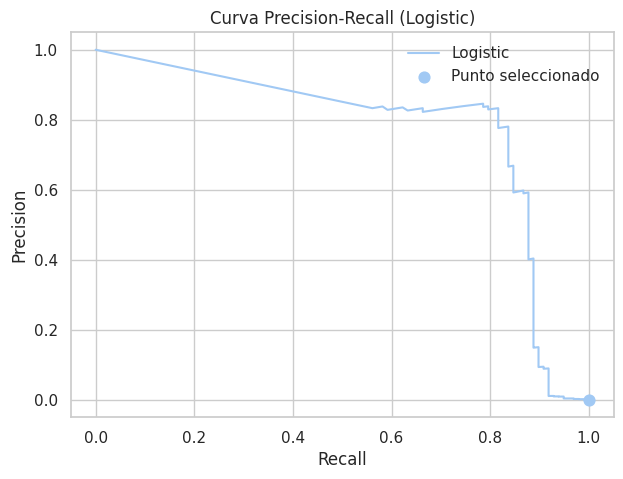

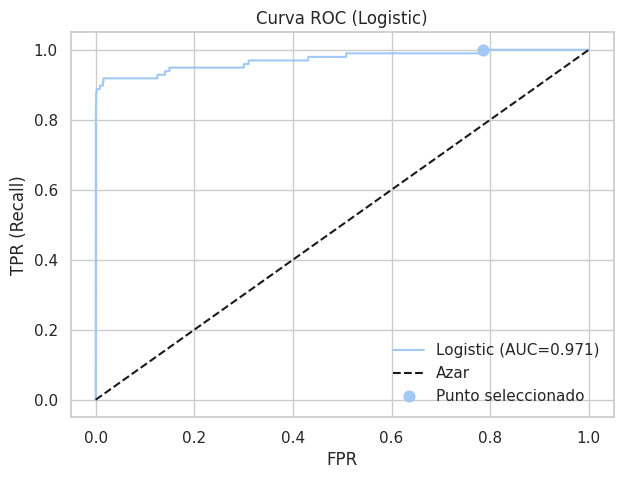

In [80]:
RECALL_MIN = 0.90      # mínimo recall requerido
FPR_MAX    = 0.005     # máximo FPR permitido (0.5% = 0.005)

model_probs = {
    "Logistic": logit_proba,
    "RandomForest": rf_proba,
    "XGBoost": xgb_proba
}

def eval_thresholds(y_true, y_proba, recall_min=RECALL_MIN, fpr_max=FPR_MAX):
    """Devuelve tabla con métricas por umbral y la mejor fila según restricciones."""
    # Curva PR para barrer thresholds
    precision, recall, thr_pr = precision_recall_curve(y_true, y_proba)
    # Curva ROC para FPR/TPR
    fpr, tpr, thr_roc = roc_curve(y_true, y_proba)

    # Para evaluar de forma uniforme, tomamos un conjunto de thresholds
    # combinando los de PR y ROC y agregando 0.5 por si acaso
    thresholds = np.unique(np.concatenate([thr_pr, thr_roc, np.array([0.5])]))
    thresholds = thresholds[(thresholds >= 0) & (thresholds <= 1)]  # seguridad

    rows = []
    P = (y_true == 1).sum()
    N = (y_true == 0).sum()

    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

        prec = 0.0 if (tp + fp) == 0 else tp / (tp + fp)
        rec  = 0.0 if (tp + fn) == 0 else tp / (tp + fn)
        f1   = 0.0 if (prec + rec) == 0 else 2 * prec * rec / (prec + rec)
        fpr_ = 0.0 if (fp + tn) == 0 else fp / (fp + tn)

        rows.append([t, prec, rec, f1, fpr_, tp, fp, fn, tn])

    df_thr = pd.DataFrame(rows, columns=["threshold","precision","recall","f1","fpr","TP","FP","FN","TN"])

    # Región factible por restricciones
    feasible = df_thr[(df_thr["recall"] >= recall_min) & (df_thr["fpr"] <= fpr_max)].copy()
    if len(feasible) > 0:
        best = feasible.sort_values(["f1","precision","recall"], ascending=False).iloc[0]
        feasible_ok = True
    else:
        # Si no hay factibles, elegir el mejor compromiso:
        # 1) maximizar recall; 2) si empata, minimizar FPR; 3) maximizar F1
        best = df_thr.sort_values(["recall", "fpr", "f1"], ascending=[False, True, False]).iloc[0]
        feasible_ok = False

    return df_thr.sort_values("threshold"), feasible, best, feasible_ok

summary_rows = []

for name, proba in model_probs.items():
    df_thr, feasible, best, ok = eval_thresholds(y_test, proba)

    print(f"\n=== {name.upper()} ===")
    if ok:
        print(f"Se encontró umbral que CUMPLE restricciones (Recall≥{RECALL_MIN}, FPR≤{FPR_MAX*100:.2f}%):")
    else:
        print("No hay umbral que cumpla ambas restricciones; se muestra el MEJOR compromiso encontrado.")

    print(best[["threshold","precision","recall","f1","fpr","TP","FP","FN","TN"]])

    # Agregar resumen para tabla comparativa
    summary_rows.append([name, ok, best["threshold"], best["precision"], best["recall"], best["f1"], best["fpr"],
                         int(best["TP"]), int(best["FP"]), int(best["FN"]), int(best["TN"]),
                         roc_auc_score(y_test, proba), average_precision_score(y_test, proba)])

summary = pd.DataFrame(summary_rows, columns=[
    "Modelo","Cumple_Restric","Threshold","Precision","Recall","F1","FPR",
    "TP","FP","FN","TN","ROC_AUC","PR_AUC"
]).sort_values(["Cumple_Restric","F1","Precision","Recall"], ascending=[False, False, False, False])

print("\n=== RESUMEN DE UMBRALES ÓPTIMOS POR MODELO ===")
display(summary)

# Visualizar el umbral elegido en PR y ROC para el mejor modelo
best_model = summary.iloc[0]["Modelo"]
best_thr   = float(summary.iloc[0]["Threshold"])
best_proba = model_probs[best_model]
best_pred  = (best_proba >= best_thr).astype(int)

print(f"\nModelo seleccionado: {best_model} | Umbral óptimo: {best_thr:.3f}")

# Curva Precision-Recall con punto operativo
prec, rec, thr = precision_recall_curve(y_test, best_proba)
plt.figure(figsize=(7,5))
plt.plot(rec, prec, label=f"{best_model}")
# punto más cercano al umbral seleccionado
idx = np.argmin(np.abs(thr - best_thr)) if len(thr) > 0 else -1
if idx >= 0 and idx < len(rec):
    plt.scatter(rec[idx], prec[idx], s=60, marker="o", label="Punto seleccionado")
plt.title(f"Curva Precision-Recall ({best_model})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()

# Curva ROC con punto operativo
fpr, tpr, thr_roc = roc_curve(y_test, best_proba)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"{best_model} (AUC={roc_auc_score(y_test, best_proba):.3f})")
plt.plot([0,1],[0,1], "k--", label="Azar")
# punto ROC correspondiente al umbral elegido (aproximación al thr más cercano)
idx2 = np.argmin(np.abs(thr_roc - best_thr)) if len(thr_roc) > 0 else -1
if idx2 >= 0 and idx2 < len(fpr):
    plt.scatter(fpr[idx2], tpr[idx2], s=60, marker="o", label="Punto seleccionado")
plt.title(f"Curva ROC ({best_model})")
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# **6. Construcción y entrenamiento del modelo de Regresión**

In [81]:
# REGRESIÓN SOBRE EL MONTO (Amount)

# 1. Definir variables
X = df.drop(columns=["Amount", "Class"])   # Usamos todas menos Amount (target) y Class (etiqueta)
y = df["Amount"]

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Modelo Lineal: LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

# 3. Modelo No Lineal: RandomForestRegressor
rf_reg = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

# **7. Métricas de evaluación del modelo de Regresión**

In [82]:
# Evaluación de ambos modelos
def evaluar_modelo(nombre, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n>>> {nombre}")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")
    return mae, rmse, r2

res_lin = evaluar_modelo("LinearRegression", y_test, y_pred_lin)
res_rf  = evaluar_modelo("RandomForestRegressor", y_test, y_pred_rf)


>>> LinearRegression
MAE  : 24.3925
RMSE : 64.6431
R²   : 0.9207

>>> RandomForestRegressor
MAE  : 12.9380
RMSE : 41.1959
R²   : 0.9678


**Comparación en tabla**

In [83]:
resultados = pd.DataFrame({
    "Modelo": ["LinearRegression", "RandomForestRegressor"],
    "MAE": [res_lin[0], res_rf[0]],
    "RMSE": [res_lin[1], res_rf[1]],
    "R²": [res_lin[2], res_rf[2]]
})

print("\n=== COMPARACIÓN DE MODELOS DE REGRESIÓN ===")
display(resultados)


=== COMPARACIÓN DE MODELOS DE REGRESIÓN ===


,Modelo,MAE,RMSE,R²
0,LinearRegression,24.392459,64.643134,0.920710
1,RandomForestRegressor,12.938039,41.195855,0.967798


# **8. Visualización**

**REAL vs. PREDICHO con etiquetas reubicadas**

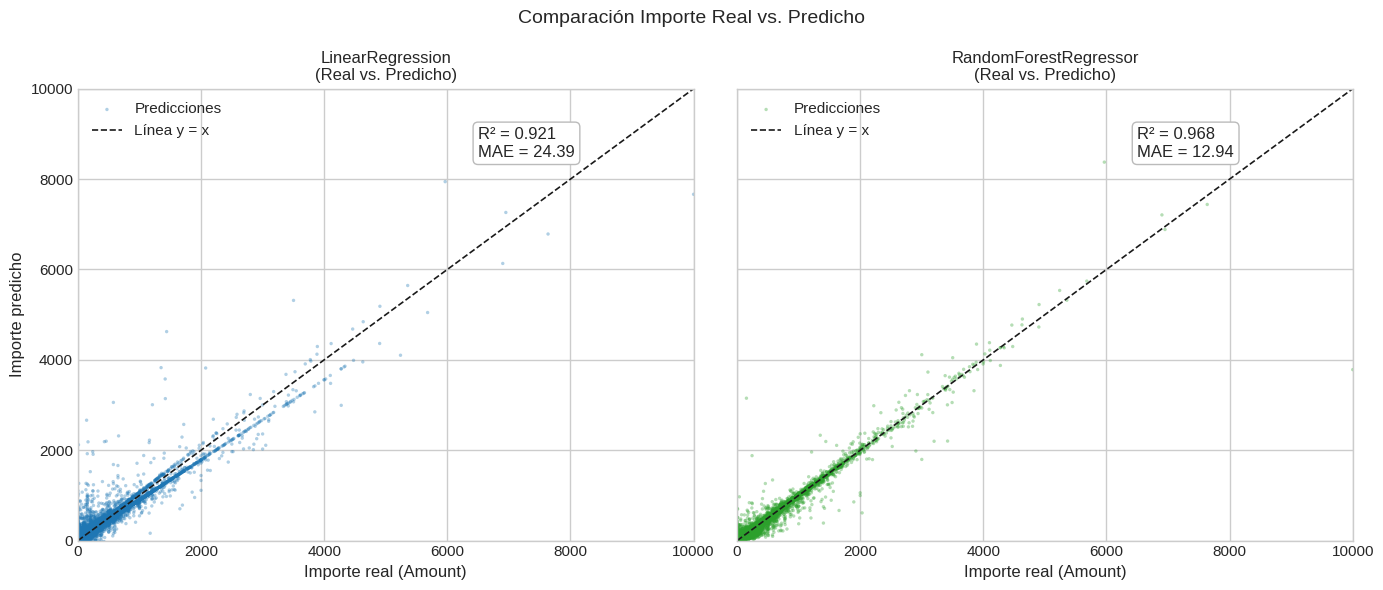

In [88]:
# MÉTRICAS Y LÍMITE DE EJES
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

r2_lin  = r2_score(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)

r2_rf   = r2_score(y_test, y_pred_rf)
mae_rf  = mean_absolute_error(y_test, y_pred_rf)

# Límite común de ejes - máximo entre reales y predichos
xmax = float(max(y_test.max(), y_pred_lin.max(), y_pred_rf.max()))

# GRÁFICO DOS PANELES: REAL vs PREDICHO
plt.style.use("seaborn-v0_8-whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# Panel A: LinearRegression
ax = axes[0]
ax.scatter(y_test, y_pred_lin, s=6, alpha=0.35, edgecolor='none', color="#1f77b4", label="Predicciones")
ax.plot([0, xmax], [0, xmax], 'k--', linewidth=1.2, label="Línea y = x")
ax.set_title("LinearRegression\n(Real vs. Predicho)")
ax.set_xlabel("Importe real (Amount)")
ax.set_ylabel("Importe predicho")
ax.set_xlim(0, xmax); ax.set_ylim(0, xmax)
ax.legend(loc="upper left")
ax.text(0.65*xmax, 0.85*xmax, f"R² = {r2_lin:.3f}\nMAE = {mae_lin:.2f}",
        bbox=dict(boxstyle="round", fc="white", ec="#BBBBBB"))

# Panel B: RandomForestRegressor
ax = axes[1]
ax.scatter(y_test, y_pred_rf, s=6, alpha=0.35, edgecolor='none', color="#2ca02c", label="Predicciones")
ax.plot([0, xmax], [0, xmax], 'k--', linewidth=1.2, label="Línea y = x")
ax.set_title("RandomForestRegressor\n(Real vs. Predicho)")
ax.set_xlabel("Importe real (Amount)")
ax.set_xlim(0, xmax); ax.set_ylim(0, xmax)
ax.legend(loc="upper left")
ax.text(0.65*xmax, 0.85*xmax, f"R² = {r2_rf:.3f}\nMAE = {mae_rf:.2f}",
        bbox=dict(boxstyle="round", fc="white", ec="#BBBBBB"))

fig.suptitle("Comparación Importe Real vs. Predicho", fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

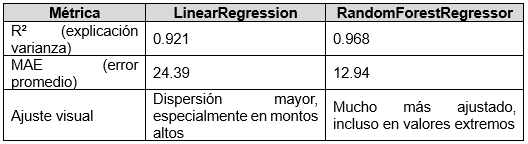

**Conclusión:**

•	Ambos modelos predicen bien el importe, pero RandomForestRegressor es claramente más robusto y preciso, ajustándose casi perfectamente a la línea de predicción ideal.

•	En un escenario real, donde se requiere minimizar los errores en montos de transacciones (porque incluso diferencias pequeñas pueden ser críticas en fraude o auditoría), RandomForest sería el modelo recomendado.

•	La regresión lineal sigue siendo útil como modelo base y como punto de comparación interpretativo, pero no alcanza la misma precisión en escenarios más complejos.
